## Классификатор вина
Выполнил: Величко Арсений, ИВТ 4


# Раздел 1: Постановка задачи (Business Understanding)
Цель: Построить классификатор для предсказания типа вина на основе химических свойств.
Задача состоит в том, чтобы на основании 13 химических характеристик вина (например, содержание алкоголя, магния и т.д.) предсказать один из трёх типов вина.

# Раздел 2: Изучение данных (Data Understanding)
Импортируем необходимые библиотеки и загрузим датасет "Вино" из библиотеки `scikit-learn`. Проанализируем структуру данных и посмотрим на их первые строки.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Раздел 3: Подготовка данных (Data Preparation)
Для начала разделим данные на признаки (X) и целевые метки (y), затем на тренировочную и тестовую выборки. Также произведем стандартизацию признаков для улучшения работы нейросети.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Размер тренировочной выборки: {X_train.shape[0]} объектов')
print(f'Размер тестовой выборки: {X_test.shape[0]} объектов')

Размер тренировочной выборки: 142 объектов
Размер тестовой выборки: 36 объектов


# Раздел 4: Моделирование (Modeling)
Создадим простую полносвязную нейросеть с помощью библиотеки Keras.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/Users/user/PycharmProjects/uni/iris-classifier/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5482 - loss: 1.0046 - val_accuracy: 0.7931 - val_loss: 0.8557
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.8670 - val_accuracy: 0.9310 - val_loss: 0.7440
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.7599 - val_accuracy: 0.9655 - val_loss: 0.6503
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9588 - loss: 0.6784 - val_accuracy: 1.0000 - val_loss: 0.5703
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9636 - loss: 0.5748 - val_accuracy: 1.0000 - val_loss: 0.4974
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9727 - loss: 0.5128 - val_accuracy: 1.0000 - val_loss: 0.4319
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.4315 - val_accuracy: 1.0000 - val_loss: 0.3720
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.3932 - val_accuracy: 1.0000 - val_loss: 0.3180
Epoch 9/50
4/4 ━━━

# Раздел 5: Оценка модели (Evaluation)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0261
Точность модели на тестовых данных: 1.00


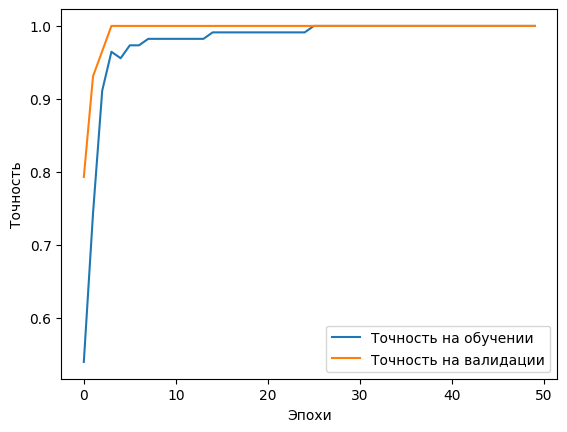

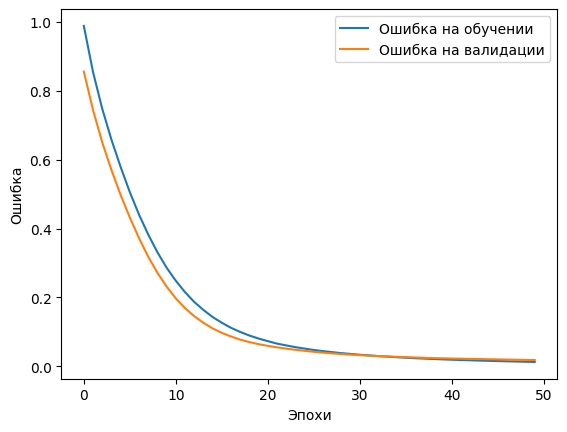

In [4]:
import matplotlib.pyplot as plt

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Точность модели на тестовых данных: {test_acc:.2f}")

plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# Раздел 6: Визуализация результатов (Deployment/Evaluation)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


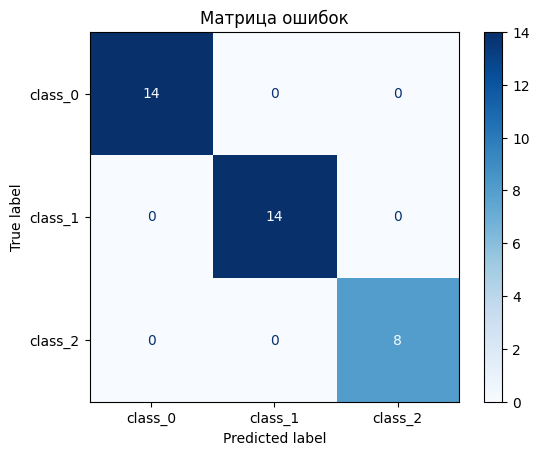

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, display_labels=wine.target_names, cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.show()